### Energy Consumption Forecasting Project

### Done By: Ashwath Bala S

### Structure of the Notebook

1. Problem Statement
2. Data Dictionary
3. Loading the Required Libraries and the Data
4. Pre-Processing the Data
5. Training and Validation Set
6. Simple Exponential Smoothing Model
7. Double Exponential Smoothing (aka Holt Linear Trend Method) Model
8. Triple Exponential Smoothing (aka Holt Winter's Trend Method) Model
9. Forecast for Next 3 Years


### 1. Problem Statement
Forecasting Energy Consumption is always useful for optimizing the energy generating process. Furthermore, it can also play a major role in comprehensive planning, operation, management and cascade utilization of energy systems. It can also act as a key technology to promote the energy market.

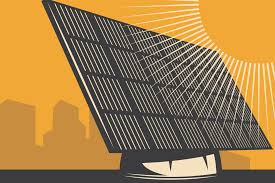

In this Project, we will use historical data of monthly electricity consumption and forecast the demand for upcoming months


## 2. Data Dictionary:

The dataset used for this project has 969 records and has the two columns :

(i)  Date  

(ii) Energy Index

### 3. Loading the Required Libraries and the Data

In [ ]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading the data
data = pd.read_csv("/content/energy consumption.csv")

In [ ]:
# Printing top few rows
data.head()

,DATE,ENERGY_INDEX
0,01-01-1939,3.3842
1,01-02-1939,3.4100
2,01-03-1939,3.4875
3,01-04-1939,3.5133
4,01-05-1939,3.5133


In [ ]:
# Checking the shape of the dataset
data.shape

(969, 2)

### 4. Pre-Processing the Data

In [ ]:
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')
data.index = data.DATE

We can see that the date starts from 01st January 1939 and is till 01st September 2019

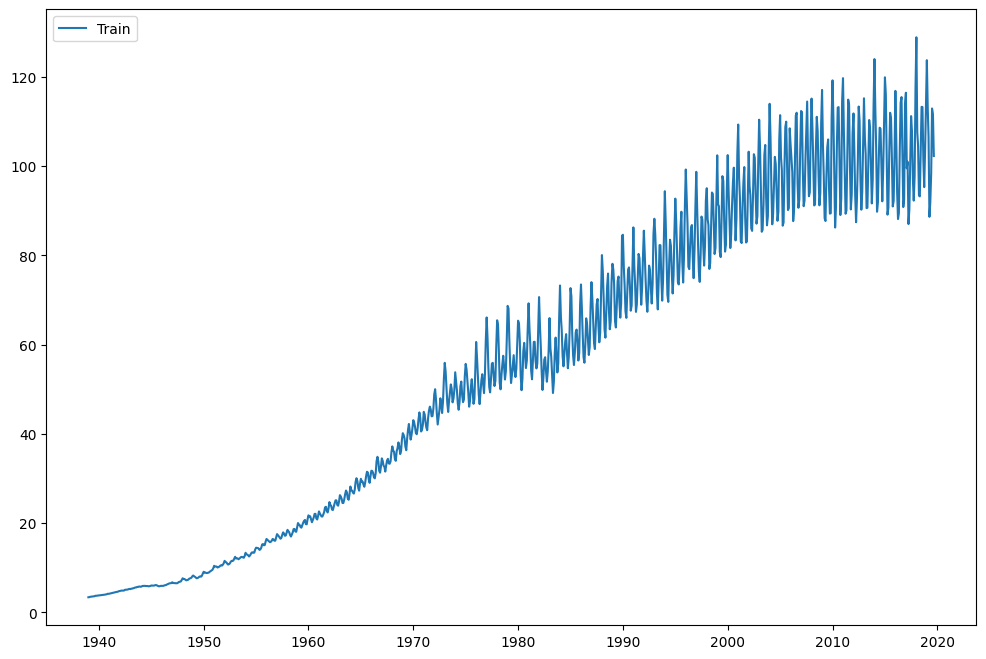

In [ ]:
# Plotting the data
plt.figure(figsize=(12,8))

plt.plot(data.index, data['ENERGY_INDEX'], label='Train')
plt.legend(loc='best')
plt.show()

### 5. Training and Validation Set

Since we are having only one dataset, let us split it into Training and Validation set. We will be training our model in Training set and will be testing the model's predictive capability in Validation set

In [ ]:
split_index = int(0.8 * len(data))

train_data = data.iloc[:split_index]
valid_data = data.iloc[split_index:]

print("Train set shape:", train_data.shape)
print("Validation set shape:", valid_data.shape)

Train set shape: (775, 2)
Validation set shape: (194, 2)


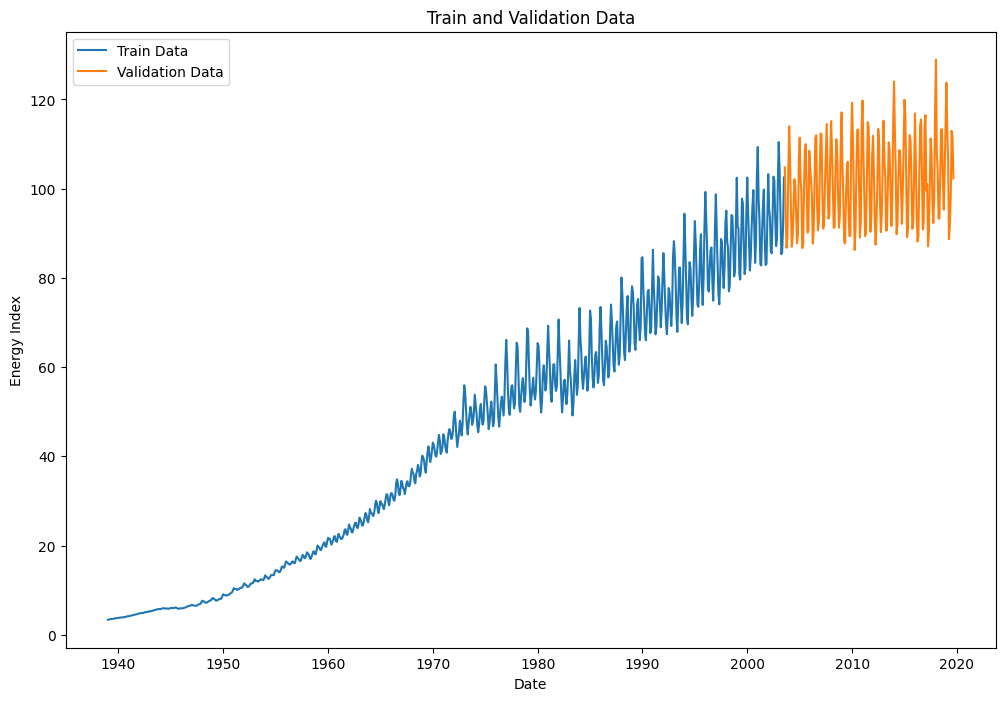

In [ ]:
plt.figure(figsize=(12, 8))

# Plotting the train data
plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='Train Data')

# Plotting the validation data
plt.plot(valid_data.index, valid_data['ENERGY_INDEX'], label='Validation Data')

# Adding legend and title
plt.legend(loc='best')
plt.title("Train and Validation Data")
plt.xlabel("Date")
plt.ylabel("Energy Index")
plt.show()

### 6. Simple Exponential Smoothing Model

In [ ]:
# Importing the required library
from statsmodels.tsa.api import SimpleExpSmoothing

In [ ]:
ses_model = SimpleExpSmoothing(np.asarray(train_data['ENERGY_INDEX']))
ses_model = ses_model.fit(smoothing_level=0.9,optimized=False)

In [ ]:
valid_data['SES'] = ses_model.forecast(len(valid_data))

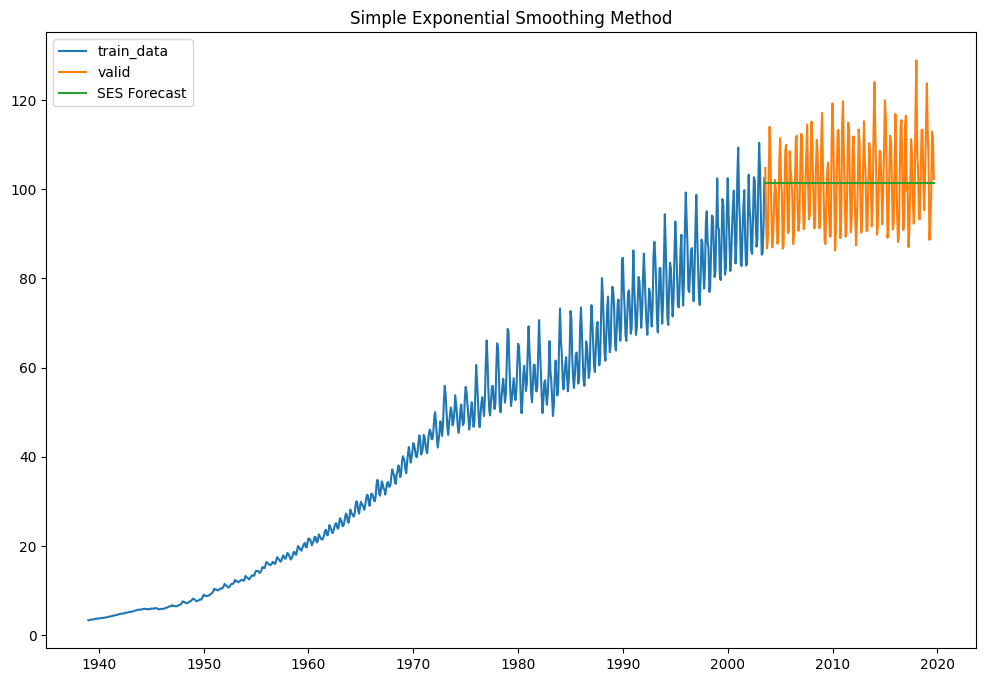

In [ ]:
# Visualizing the Predictions made by Simple Exponential Model
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['SES'], label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

In [ ]:
# Calculating the RMSE
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['SES']))
print('The RMSE value for Simple Exponential Smoothing Method is', rmse)

The RMSE value for Simple Exponential Smoothing Method is 9.514782103285551


### 7. Double Exponential Smoothing (aka Holt Linear Trend Method) Model

In [ ]:
# Importing the required library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
des_model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']), trend='add')
des_model = des_model.fit(smoothing_level=0.01, smoothing_slope=0.0001)

valid_data['Holt_linear'] = des_model.forecast(len(valid_data))

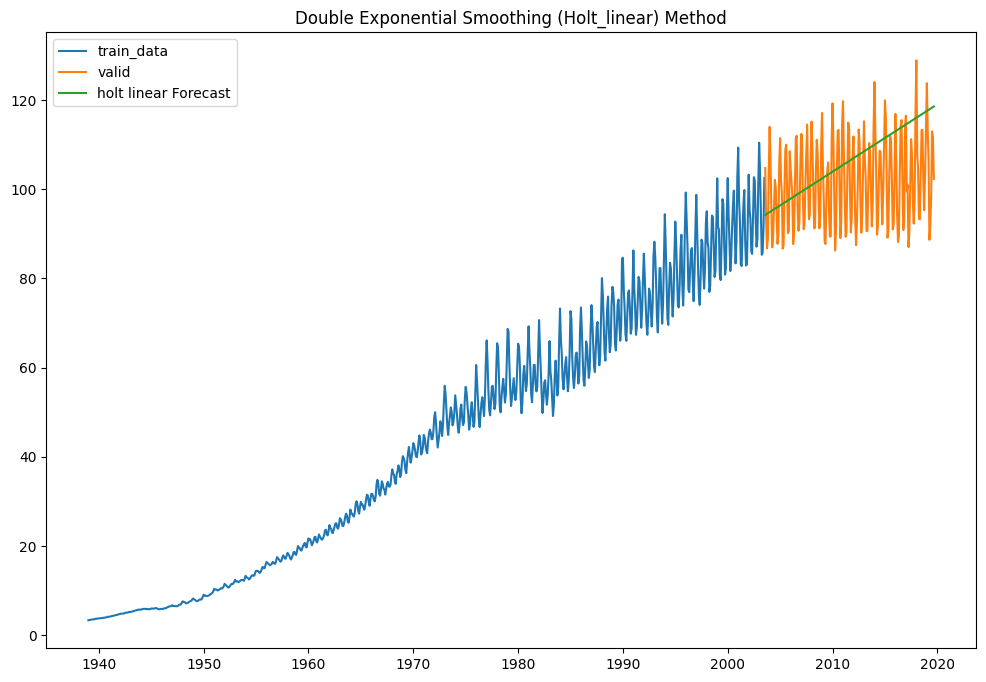

In [ ]:
# Visualizing the Predictions made by Double Exponential Smoothing Model
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_linear'], label='holt linear Forecast')
plt.legend(loc='best')
plt.title("Double Exponential Smoothing (Holt_linear) Method")
plt.show()

In [ ]:
# Calculating the RMSE of Double Exponential Smoothing Model
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_linear']))
print('The RMSE value for Holt Linear Method is', rmse)

The RMSE value for Holt Linear Method is 11.788822431567352


### 8. Triple Exponential Smoothing (aka Holt Winter's Trend Method) Model

In [ ]:
tes_model = ExponentialSmoothing(np.asarray(train_data['ENERGY_INDEX']) ,seasonal_periods=12 ,trend='add', seasonal='mul',)
tes_model = tes_model.fit(smoothing_level=0.4, smoothing_slope=0.1, smoothing_seasonal=0.8)

valid_data['Holt_Winter'] = tes_model.forecast(len(valid_data))

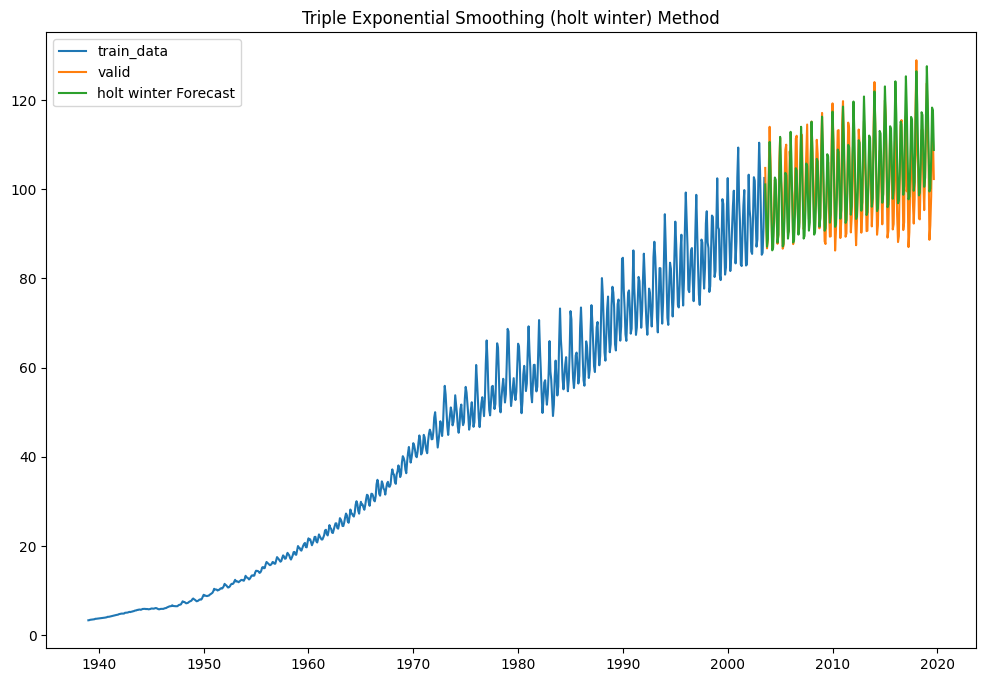

In [ ]:
# Visualizing the Predictions made by Triple Exponential Model
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['ENERGY_INDEX'], label='train_data')
plt.plot(valid_data.index,valid_data['ENERGY_INDEX'], label='valid')
plt.plot(valid_data.index,valid_data['Holt_Winter'], label='holt winter Forecast')
plt.legend(loc='best')
plt.title("Triple Exponential Smoothing (holt winter) Method")
plt.show()

In [ ]:
# Calculating the RMSE
rmse = sqrt(mean_squared_error(valid_data['ENERGY_INDEX'], valid_data['Holt_Winter']))
print('The RMSE value for Holt Winter Method is', rmse)

The RMSE value for Holt Winter Method is 4.821873528949791


RMSE of our Models are:
1. Simple Exponential Smoothing - 9.51
2. Double Exponential Smoothing - 11.78
3. Triple Exponential Smoothing - 4.82

Clearly, we can see that our "Triple Exponential Model" with low RMSE value is performing better and has better forecasting capability.

Let's proceed with energy forecasting for next 3 years using our "Triple Exponential Smoothing Model"

### 9. Forecast for next 3 Years

In [ ]:
# We don't have any test set. So, let us prepare the test set for our forecasting model

test_set = pd.DataFrame(data=pd.date_range(start='2019-10-01', end='2022-10-01', freq='MS'),
                        columns=['DATE'])

# Printing top few rows
test_set.head()

,DATE
0,2019-10-01
1,2019-11-01
2,2019-12-01
3,2020-01-01
4,2020-02-01


In [ ]:
# Printing bottom few rows of test set
test_set.tail()

,DATE
32,2022-06-01
33,2022-07-01
34,2022-08-01
35,2022-09-01
36,2022-10-01


Thus, we have prepared our dataset for predicting for next 3 Years

In [ ]:
# Forecast future values using the trained model
predictions = tes_model.forecast(steps=len(test_set))

In [ ]:
# Storing predictions in the test set
test_set['ENERGY_INDEX'] = predictions

In [ ]:
# Printing the test set along with predictions done
test_set.head()

,DATE,ENERGY_INDEX
0,2019-10-01,101.077382
1,2019-11-01,93.454382
2,2019-12-01,87.145619
3,2020-01-01,88.883516
4,2020-02-01,100.956864


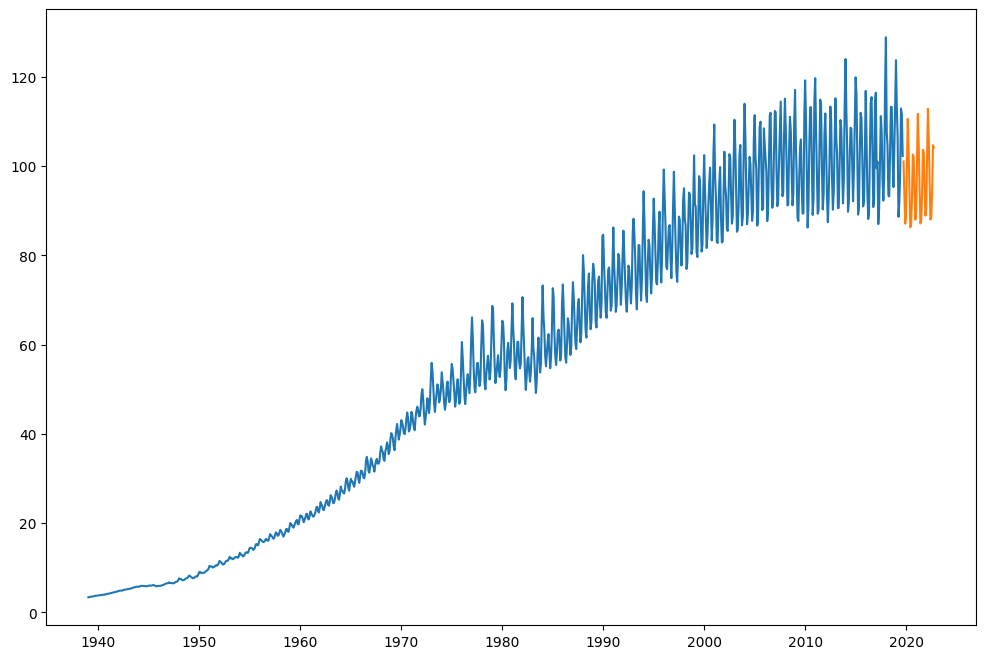

In [ ]:
# Visualizing the Predictions made by our Triple Exponential Smoothing Model in Test Set

plt.figure(figsize = (12,8))

plt.plot(data.index, data['ENERGY_INDEX'], label = 'train')
plt.plot(test_set.DATE, test_set['ENERGY_INDEX'], label = 'predictions')
plt.show()

### In this Project, we have built Exponential Smoothing Models and forecasted the Energy Consumption for next 3 Years